<a href="https://colab.research.google.com/github/peterm-m/03MARI---Algoritmos-de-Optimizacion---2019/blob/master/pedro_martinez_moreno_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Guiada 2
​
### Pedro Martinez Moreno
​
#### [link Google Colaboratory](https://colab.research.google.com/drive/1-1Ou6c8UzFcmDXvEcpmMdVMf6rE-PBBm)  

​
#### [link GitHub](https://github.com/peterm-m/03MARI---Algoritmos-de-Optimizacion---2019)
​
​


## Viaje por el rio.

#### Explicación del problema:
Tenemos un conjunto de destinos a lo largo de un rio ir de un sitio a otro nos cuesta cierta cantidad de dinero, el problema consiste en buscar la ruta por la cual el precio sea el mejor posible.

Para ello partimos de una tabla de tarifas que indican el dinero que cuesta ir de un destino a otro.

#### Implementación:

Siguiendo el proceso visto en clase para resolver el problema del viaje por el rio tenemos que:

In [0]:
def precios(tarifas): # calcula y guarda los mejores precios y rutas para ir de un destino a otro.
    n=len(tarifas[0]) #numero de destinos
    
    # inicializamos precios y rutas
    #ponemos precios iniciales de tal forma que siempre se puedan mejorar
    precios=[[9999]*n for i in [9999]*n]
    #inicialmente rutas vacias
    rutas = [['']*n for i in ['']*n]
    
    
    for i in range (n-1):
        #comprobamos destinos que tenemos por delante
        for j in range(i+1,n):
            #inicialmente tomamos la tarifa para ir de i a j directos
            minimo = tarifas[i][j]
            rutas[i][j]=i
            
            for k in range(i,j):
                #comprobamos destinos intermedios entre i y j
                if precios[i][k]+tarifas[k][j]<minimo: # si hay alguno mejor lo actualizamos
                    minimo = precios[i][k]+tarifas[k][j]
                    rutas[i][j]=k
                precios[i][j]=minimo
    return precios,rutas

# una vez con las rutas y precios imprementamos la función

def calcular_ruta(rutas,origen,destino): # de forma recursiva buscamos  la mejor forma
                                      # de ir por los nodos intermedios
    if origen==destino:
      print('mejor ruta:')
      return origen #caso base
    else:
        return str(calcular_ruta(rutas,origen,rutas[origen][destino]))+','+str(destino) 

    
    
tarifas =[[0,5,4,3,999,999,999],[999,0,999,1,999,4,10],[999,999,0,1,999,4,10],[999,999,999,0,5,6,9],[999,999,999,999,0,999,4],
         [999,999,999,999,999,999,0]]


precios,rutas=precios(tarifas)

calcular_ruta(rutas,0,6)




mejor ruta:


'0,2,5,6'

## Asignación de tareas.

### Explicación del problema.



Tenemos que asignar n tareas a n agentes de forma que se minimize el coste de dinero.

Para ello partimos de una tabla donde se indica lo que cuesta asignarle la tarea x al agente y.

### Implementación.

Siguiendo el proceso visto en clase para resolver el problema de asignación de tareas:



In [0]:
              #tareas
sueldos   =[[11,12,18,40],
            [14,15,13,22],  #agentes
            [11,17,19,23],
            [17,14,20,28]]

 - Modelizamos el espacio de estados: Un estado consta de una tupla donde el indice indica el trabajador del que estamos hablando y el valor la tarea asignada. Ejemplo: (1,0,3,2) seria la asignación del agente 0 a la tarea 1, agente 2 tarea 0 ...

Modelizando de esta forma el espacio de estados, la función objetivo a optimizar es:



In [0]:
def gasto_sueldos(estado,sueldos):
  ganancia=0
  for agente in range(len(estado)): # suma el gasto en suesdos asignado la tarea 
                                    #indicada en el estado al agente.
    ganancia +=sueldos[estado[agente]][agente]
  return ganancia

gasto_sueldos((0,1,2,3),sueldos)
gasto_sueldos((0,1),sueldos)

26

Una vez con el espacio de estados y la función objetivo pasamos a optimizar esta.


#### Fuerza bruta.

Para buscar la solución por fuerza bruta, simplemente comprobamos todas las permutaciones de la tupla
$(0,1,2,3...n-1)$. Esto ya nos dice que el número de estados en el que se va a buscar tiene $n!$ estados y que el algoritmo será muy poco eficiente.

In [0]:
from itertools import permutations

def fuerza_bruta(sueldos):
  #inicializamos la solución de tal forma que siempre tengamos una mejor alternativa.
  menor_gasto= 10e10
  mejor_estado= tuple()

  for estado in list(permutations(range(len(sueldos)))): #generamos una lista con todas las permutaciones
    gasto_estado = gasto_sueldos(estado,sueldos)
    if gasto_estado<menor_gasto:
      menor_gasto=gasto_estado
      mejor_estado=estado
  
  print('mejor solución :,', mejor_estado, ', con gasto en sueldos :' ,menor_gasto)

  
  
fuerza_bruta(sueldos)

mejor solución :, (0, 3, 1, 2) , con gasto en sueldos : 61


Para observar como aumenta la complejidad al aumentar el número de agentes y tareas, ejecutamos el programa para diferentes tamaños:

mejor solución :, (1, 0, 2) , con gasto en sueldos : 79
mejor solución :, (2, 0, 3, 1) , con gasto en sueldos : 164
mejor solución :, (2, 3, 0, 4, 1) , con gasto en sueldos : 101
mejor solución :, (0, 5, 3, 2, 1, 4) , con gasto en sueldos : 179
mejor solución :, (5, 2, 6, 3, 4, 1, 0) , con gasto en sueldos : 162
mejor solución :, (3, 0, 7, 6, 1, 4, 5, 2) , con gasto en sueldos : 142
mejor solución :, (0, 8, 5, 1, 6, 7, 4, 3, 2) , con gasto en sueldos : 71
mejor solución :, (3, 5, 7, 6, 1, 9, 4, 2, 8, 0) , con gasto en sueldos : 146


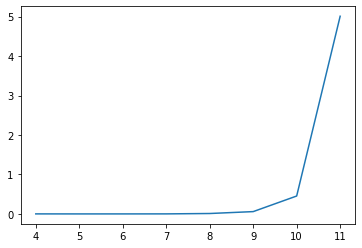

In [0]:
from random import randint
from time import time
import matplotlib.pyplot as plt  

tiempo=list()

for i in range(3,11):
    sueldos =[[randint(0,100) for x in range(i)] for j in range(i)]
    t_ini=time()
    fuerza_bruta(sueldos)
    t_fin=time()
    tiempo.append(t_fin-t_ini)


plt.plot(list(range(4,4+len(tiempo))),tiempo)
plt.show()

# restablecemos los sueldos del enunciado

              #tareas
sueldos   =[[11,12,18,40],
            [14,15,13,22],  #agentes
            [11,17,19,23],
            [17,14,20,28]]

Como vemos la complejidad y tamaño del problema crece demasiado rápido ya que el espacio de estado crece como $n!$, por ello con fuerza bruta, no podremos tratar en un tiempo razonable problemas de un tamaño de 13 o 14 tareas.

#### Ramificación y poda.

Para implementar una solución con la técnica de ramificación, seguimos los siguientes paso:

- Modelizamos el espacio de estado: Esto no cambia respecto al método de fuerza bruta.
- Ramificación: No creamos un estado en un solo paso, si no que lo creamos de forma progresiva, viendo en cada paso o nodo los nodos hijos que podemos crear. Por ejemplo para el estado intermedio $(0,)$ podemos crear los estado $(0,1),(0,2),(0,3)$:


In [0]:
def crear_hijos(nodo,n):
  hijos = list()

  for i in range(n):
    if i not in nodo:
      hijos.append({'s':nodo+(i,)})
  return hijos

crear_hijos((0,),4)



[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

- Poda: Para podar necesitamos saber la cota inferior y superior de las solución que serán conseguidas en una rama,
    - Cota Inferior: Para un nodo que contenga un estado aún no definido del todo , calculamos la parte ya establecida del estado con la función objetivo (gato_sueldos), por otro lado la parte del estado aún no especificada es estimada  cogiendo la mejor tarea para cada agente.
    - Cota superior: simplemente usaremos la mejor solución encontrada hasta el momento

Con la cota inferior y superior, tenemos las herramientas para poder decidir si un nodo es capaz de contener la solución buscada, y poder descartar este si no contiene la solución.



In [0]:
def cota_inferior(estado,sueldos):
  #parte establecida del estado
  gastos = gasto_sueldos(estado,sueldos)
  #estimacion de la parte aun no conocida del estado
  for tarea in range(len(sueldos)):
    if tarea not in estado:
      gastos+=min([sueldos[tarea][agente] for agente in range(len(estado),len(sueldos))])
  return gastos



- Por último necesitamos una estrategia para recorrer el arbol en busca de la solución, esta consiste en buscar primero en los nodos que tienen una cota inferior mas prometedora, es decir una cota mas baja.


Con todo lo hecho hasta ahora pasamos a implementar el programa principal:




In [0]:
def ramificacion_poda(sueldos):

  tareas=len(sueldos)
  # inicializamos como una solucion cualquiera.
  mejor_estado=tuple(i for i in range(tareas)) 
  cota_superior=gasto_sueldos(mejor_estado,sueldos)

  nodos=list()
  nodos.append({'s':(),'ci':cota_inferior((),sueldos)}) #inicialmente no hemos asignado ninguna tarea a ningun agente

  iteracion=0

  while (len(nodos)>0):
    iteracion+=1

    nodo_prometedor=[ min(nodos , key=lambda x:x['ci']) ][0]['s'] # primero exploramos los mas prometedores
    hijos=[{'s':x['s'],'ci':cota_inferior(x['s'],sueldos)} for x in crear_hijos(nodo_prometedor,tareas)] #generamos hijos

    nodo_final=[x for x in hijos if len(x['s'])==tareas] 
    if len(nodo_final)>0: # si encontramos alguna mejor que la mejor solución actual actualizamos
      if nodo_final[0]['ci']<cota_superior:
        cota_superior=nodo_final[0]['ci']
        mejor_estado= nodo_final

    hijos=[x for x in hijos if  x['ci']<cota_superior] # podamos los que tengan una cota inferior mayor a la cota superior

    nodos.extend(hijos)#añadimos los hijos

    nodos=[x for x in nodos if x['s']!= nodo_prometedor] #eliminamos el ramificado

  #print('mejor solución :', mejor_estado[0]['s'], ', con gasto en sueldos :' ,  cota_superior)




ramificacion_poda(sueldos)


Para ver la eficiencia de esta algoritmo ejecutamos esta para varios tamaños:




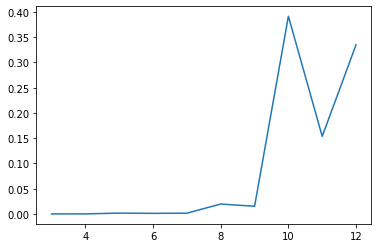

In [0]:
tiempo=list()
lista_tiempos=list()

for i in range(3,13):
    for t in range(5):
        sueldos=[[randint(0,100) for x in range(i)] for j in range(i)]
        t_ini=time()
        ramificacion_poda(sueldos)
        t_fin=time()
        tiempo.append(t_fin-t_ini)
    tiempo_pro=sum(tiempo)/5
    lista_tiempos.append(tiempo_pro)
    tiempo=list()


plt.plot(list(range(3,13)),lista_tiempos)
plt.show()

hemos ejecutado varias veces el código para cada tamaño ya que la eficiencia del algoritmo depende mucho del caso particular y de cuanto se pode el árbol.

Un algoritmo de ramificación y poda puede ser tan ineficiente como el de fuerza bruta en el peor de los caso, con esta técnica como podemos ver solo conseguimos tiempos promedios muchisimo mejores que usando fuerza bruta. por tanto este problema de asignación puede  intratable con un tamaño de 15 tareas o solucionar uno con 20 tareas fácilmente.


------------------------


##Descenso del gradiente.


Implementamos lo que hemos visto en clase sobre el descenso del gradiente.


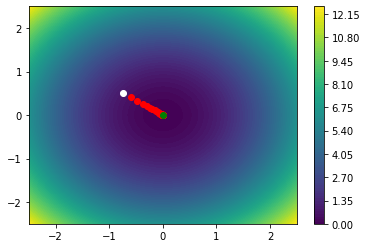

solucion: [-2.5969069632598112e-49, 1.792304937185918e-49] 9.956282763688312e-98


In [0]:
import math 
import matplotlib.pyplot as plt
import numpy as np
import random


f=lambda x:x[0]**2+x[1]**2  #funcion
df=lambda x:[2*x[0],2*x[1]] #gradiente


resolucion=100 

rango=2.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[ix,iy]=f([y,x])
# lista con valores de la función



#dibujamos función
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()


#empezamos desde un punto aleatorio
P=[random.uniform(-2,2),random.uniform(-2,2)]
plt.plot(P[0],P[1],'o',c='white')



TA=.1 #tasa de aprendizaje 

#Descenso del gradiente, iteraciones
for _ in range(500):
  grad = df(P)
  P[0],P[1]=P[0]-TA*grad[0],P[1]-TA*grad[1]
  plt.plot(P[0],P[1],'o',c='red')



plt.plot(P[0],P[1],'o',c='green') 
plt.show()
print('solucion:', P, f(P))

Implementamos ahora una aproximación al gradiente:

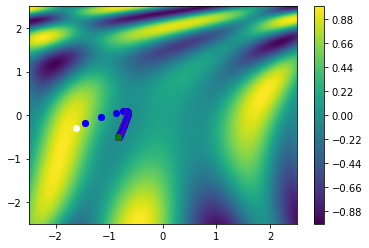

solucion: [-0.830255946736151, -0.5138707382353276] -0.04195302763912233


In [0]:
f= lambda x:np.sin(0.5*x[0]**2-0.25*x[1]**2+3)*np.cos(2*x[0]+1-np.exp(x[1])) # funcion y gradiente
df= lambda x:[np.cos(0.5*x[0]**2-0.25*x[1]**2+3)*(x[0])*np.cos(2*x[0]+1-np.exp(x[1]))-np.sin(0.5*x[0]**2-0.25*x[1]**2+3)*np.sin(2*x[0]+1-np.exp(x[1]))*2,
              np.cos(0.5*x[0]**2-0.25*x[1]**2+3)*(-x[1]/2)*np.cos(2*x[0]+1-np.exp(x[1]))+np.sin(0.5*x[0]**2-0.25*x[1]**2+3)*np.sin(2*x[0]+1-np.exp(x[1])*2)*np.exp(x[1])]

def diferencial(P): # calcula aproximadamente el gradiente segun la definición
  h=0.01
  T=np.copy(P)
  grad=np.zeros(2)
  for it,th in enumerate(P):
    T[it]=T[it]+h 
    grad[it]=(f(T)-f(P))/(h)
  return grad






resolucion=100 

rango=2.5
 # lista con valores de la grafica
X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[ix,iy]=f([y,x])


# la dibujamos
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()


P=[random.uniform(-2,2),random.uniform(-2,2)]#partimos de un punto aleatorio
plt.plot(P[0],P[1],'o',c='white')



TA=.1
P_exacto=P
P_aprox=P

# descanso del gradiente exacto y aproximado
for _ in range(500):
  grad_exacto = df(P_exacto)
  grad_aprox  = diferencial(P_aprox)
  P_exacto[0],P_exacto[1]=P_exacto[0]-TA*grad_exacto[0],P_exacto[1]-TA*grad_exacto[1]
  P_aprox[0],P_aprox[1]=P_aprox[0]-TA*grad_aprox[0],P_aprox[1]-TA*grad_aprox[1]

  plt.plot(P_exacto[0],P_exacto[1],'o',c='red')
  plt.plot(P_aprox[0],P_aprox[1],'o',c='blue')



plt.plot(P[0],P[1],'o',c='green')
plt.show()
print('solucion:', P, f(P))

Como se ve en la imagen la aproximación al gradiente y indistingible del gradiente exacto.